**<span style="color:#0638b2; font-size:32px">
Report - Visuals Based on Experiments
</span>** <br>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<hr style="border:7px solid #1b7f97">

**<span style="color:#1b7f97; font-size:20px">
Phase I - Performance Across Models
</span>** <br>

In [3]:
## Build dataframe of model results

phI_model_cols = ['model', 'training_accuracy', 'training_loss', 'validation_accuracy', 'validation_loss', 
                  'test_accuracy', 'test_loss', 'test_precission', 'test_recall']

phI_model_data = [ 
    ['Baseline CNN', .9248, .2208, .9219, .2004, .634, .9438, .58, .723],
    ['EfficientNetB3', .9905, .0322 , .9969, .0197, .634, 1.266, .614, .538],
    ['ResNet50 ', 1.000, .0018, .9984, .0038, 0.5252, 2.6055, 0.6538, 0.3863],
    ['MobileNet', 0.9688, 0.1509, 0.9589, .1067, 0.5269, 2.8078, 0, 0],
    ['DenseNet121', .9062, .1984, .97, .09, 0, 0],
    ['NasNetLarge', .6903, .6187, .7437, .5284, .627, 0.6730, .731, .292],
]

In [4]:
phI_model_results = pd.DataFrame(phI_model_data, columns=phI_model_cols)
phI_model_results.head(10)

,model,training_accuracy,training_loss,validation_accuracy,validation_loss,test_accuracy,test_loss,test_precission,test_recall
0,Baseline CNN,0.9248,0.2208,0.9219,0.2004,0.6340,0.9438,0.5800,0.7230
1,EfficientNetB3,0.9905,0.0322,0.9969,0.0197,0.6340,1.2660,0.6140,0.5380
2,ResNet50,1.0000,0.0018,0.9984,0.0038,0.5252,2.6055,0.6538,0.3863
3,MobileNet,0.9688,0.1509,0.9589,0.1067,0.5269,2.8078,0.0000,0.0000
4,DenseNet121,0.9062,0.1984,0.9700,0.0900,0.0000,0.0000,NaN,NaN
5,NasNetLarge,0.6903,0.6187,0.7437,0.5284,0.6270,0.6730,0.7310,0.2920


In [5]:
print(phI_model_results.columns)

Index(['model', 'training_accuracy', 'training_loss', 'validation_accuracy',
       'validation_loss', 'test_accuracy', 'test_loss', 'test_precission',
       'test_recall'],
      dtype='object')


In [6]:
# Reshape Dataframe
phI_model_results_reshaped = pd.melt(phI_model_results, id_vars=['model'], value_vars=['training_accuracy', 'validation_accuracy', 'test_accuracy', 
                                    'test_precission', 'test_recall'],  ##value_vars=phI_model_results.columns[1:],
                                    var_name='model_metric', value_name='value') # Select all columns except 'model_name' 
phI_model_results_reshaped.head(3)

,model,model_metric,value
0,Baseline CNN,training_accuracy,0.9248
1,EfficientNetB3,training_accuracy,0.9905
2,ResNet50,training_accuracy,1.0000


#### **Plots**

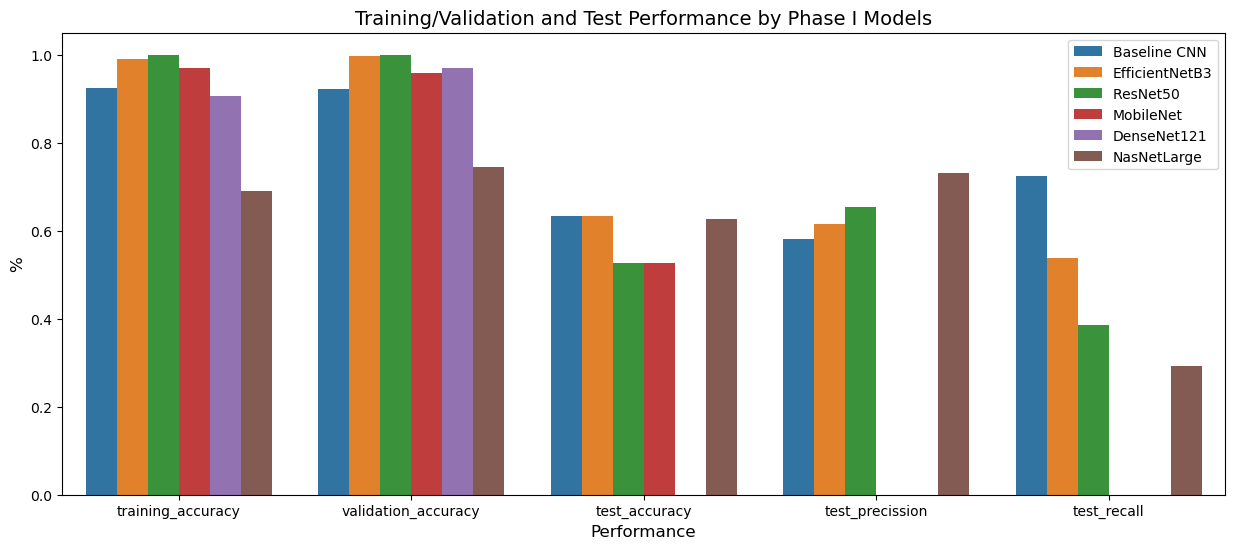

In [7]:
# Setup plot.
plt.figure(figsize=(15,6))
rs_count_plot = sns.barplot(x='model_metric', y='value',hue='model', data=phI_model_results_reshaped)

plt.xlabel('Performance', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.title('Training/Validation and Test Performance by Phase I Models', fontsize=14)
plt.legend(loc='upper right')

<hr style="border:20px solid #1b7f97">

**<span style="color:#1b7f97; font-size:30px">
Phase II - Performance Across DataSets on EfficientNetB3
</span>** <br>

In [8]:
## Build dataframe of model results

phII_ENb3_ds_cols = ['dataset', 'training_accuracy', 'training_loss', 'validation_accuracy', 'validation_loss', 
                  'test_accuracy', 'test_loss', 'test_precission', 'test_recall', 'test_specificity']

phII_ENb3_ds_data = [ 
    ['Data Set 1', .9469, .1517, .9875, .0480, .532, 2.5149, .542, .419, .645],
    ['Data Set 2', .8559, .0322 , .9156, .0197, .677, 0, .69, .645, .71],
    ['Data Set 3', .9150, .2007, .9383, .1700, 0.645, 0, 0.714, 0.484, .806],
    ['Data Set 4', 0.9013, 0.2430, 0.9308, .1718, 0.71, 0, 0.81, .548, .871],
]

In [9]:
phII_ENb3_ds_results = pd.DataFrame(phII_ENb3_ds_data, columns=phII_ENb3_ds_cols)
phII_ENb3_ds_results.head()

,dataset,training_accuracy,training_loss,validation_accuracy,validation_loss,test_accuracy,test_loss,test_precission,test_recall,test_specificity
0,Data Set 1,0.9469,0.1517,0.9875,0.0480,0.532,2.5149,0.542,0.419,0.645
1,Data Set 2,0.8559,0.0322,0.9156,0.0197,0.677,0.0000,0.690,0.645,0.710
2,Data Set 3,0.9150,0.2007,0.9383,0.1700,0.645,0.0000,0.714,0.484,0.806
3,Data Set 4,0.9013,0.2430,0.9308,0.1718,0.710,0.0000,0.810,0.548,0.871


In [10]:
print(phII_ENb3_ds_results.columns)

Index(['dataset', 'training_accuracy', 'training_loss', 'validation_accuracy',
       'validation_loss', 'test_accuracy', 'test_loss', 'test_precission',
       'test_recall', 'test_specificity'],
      dtype='object')


In [11]:
# Reshape Training, Validation, Test Accuracy
phII_ENb3_ds_results_reshaped = pd.melt(phII_ENb3_ds_results, id_vars=['dataset'], value_vars=['training_accuracy', 'validation_accuracy', 
                                    'test_accuracy'],  ##value_vars=phI_model_results.columns[1:],
                                    var_name='model_metric', value_name='value') # Select all columns except 'model_name' 
phII_ENb3_ds_results_reshaped.head(3)

,dataset,model_metric,value
0,Data Set 1,training_accuracy,0.9469
1,Data Set 2,training_accuracy,0.8559
2,Data Set 3,training_accuracy,0.9150


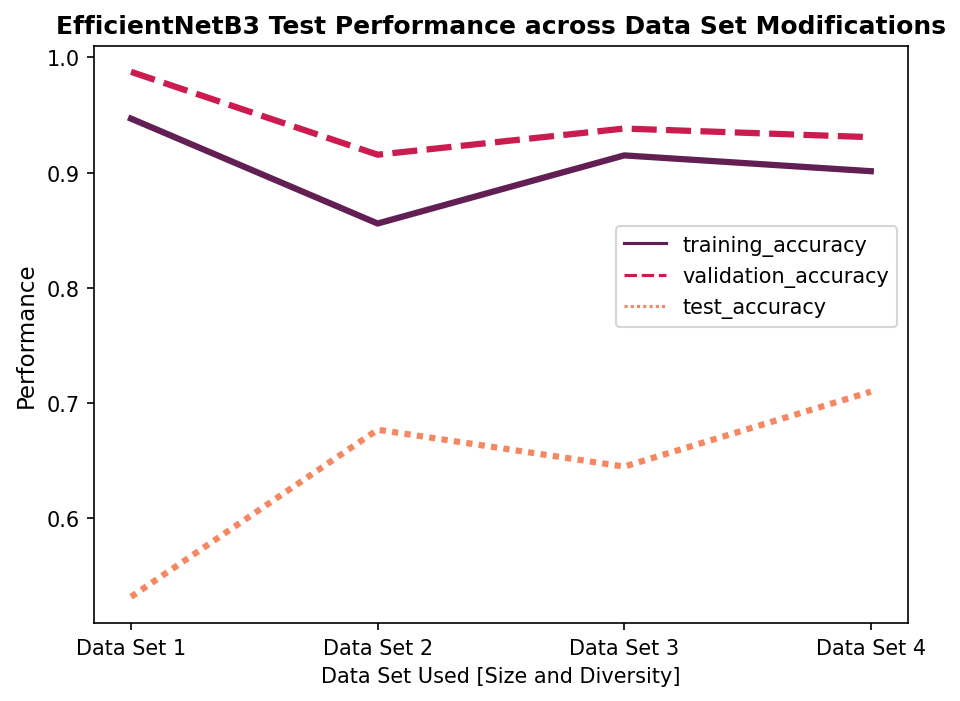

In [20]:
# Setup plot. 
plt.figure(figsize=(7,5), dpi=120)

sns.lineplot(x='dataset',y='value', hue = 'model_metric', data=phII_ENb3_ds_results_reshaped,
             errorbar=None, style='model_metric', palette='rocket', linewidth=3)
plt.xlabel('Data Set Used [Size and Diversity]', fontsize=10)
plt.ylabel('Performance', fontsize=11)
plt.title('EfficientNetB3 Test Performance across Data Set Modifications', fontweight='bold')
plt.legend(loc='center right',  bbox_to_anchor=(1, 0.6))

In [13]:
# Testing Metrics
phII_ENb3_ds_test_reshaped = pd.melt(phII_ENb3_ds_results, id_vars=['dataset'], value_vars=['test_precission', 'test_recall', 
                        'test_specificity'],  ##value_vars=phI_model_results.columns[1:],
                        var_name='model_metric', value_name='value') # Select all columns except 'model_name' 
phII_ENb3_ds_test_reshaped.head(3)

,dataset,model_metric,value
0,Data Set 1,test_precission,0.542
1,Data Set 2,test_precission,0.690
2,Data Set 3,test_precission,0.714


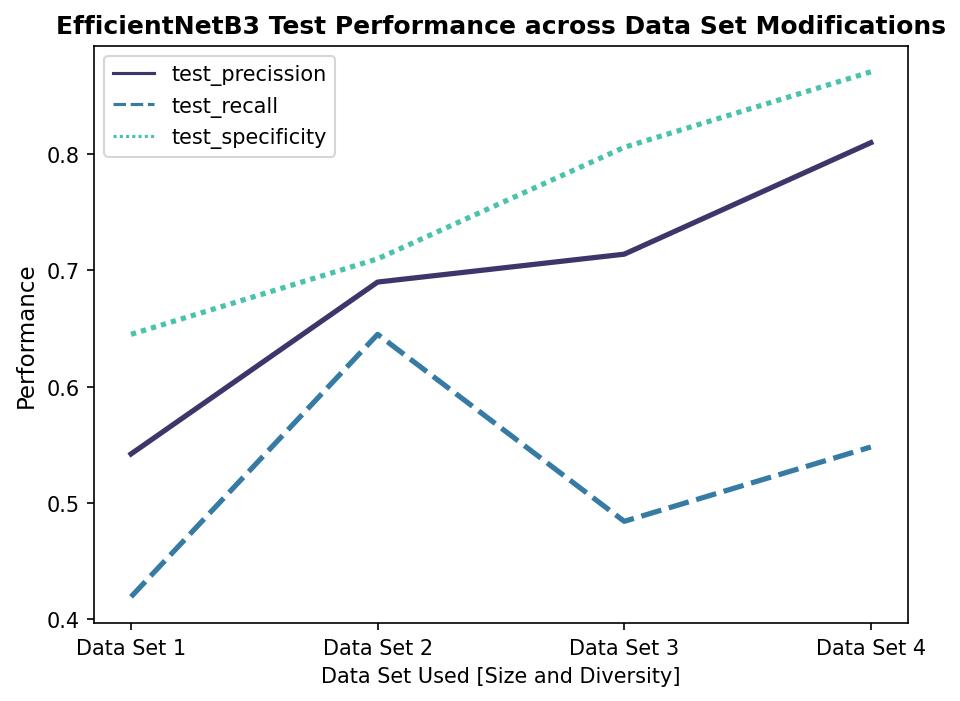

In [21]:
# Setup plot. 
plt.figure(figsize=(7,5), dpi=120)

sns.lineplot(x='dataset',y='value', hue = 'model_metric', data=phII_ENb3_ds_test_reshaped,
             errorbar=None, style='model_metric', palette='mako', linewidth=2.5)
plt.xlabel('Data Set Used [Size and Diversity]', fontsize=10)
plt.ylabel('Performance', fontsize=11)
plt.title('EfficientNetB3 Test Performance across Data Set Modifications', fontweight='bold')
plt.legend(loc='upper left')

<hr style="border:20px solid #1b7f97">

**<span style="color:#1b7f97; font-size:30px">
Phase III - Performance Across Fine Tuning Layers
</span>** <br>

In [22]:
## Build dataframe of model results

phII_ENb3_layer_cols = ['opened_layers', 'training_accuracy', 'training_loss', 'validation_accuracy', 'validation_loss', 
                  'test_accuracy', 'test_loss', 'test_precission', 'test_recall', 'test_specificity']

phII_ENb3_layer_data = [ 
    ['Base', .9168, .0000, .9514, .0000, .774, .0, .84, .677, .871],
    ['10 Layers', .941, .1500, .9719, .0869, .758, .0, .750, .774, .742],
    ['15 Layers', .9552, .1186, .9579, .1281, .823, .0, .812, .839, .806], 
    ['20 Layers', .9591, .1185, .9869, .0537, .79, .0, .875, .677, .903],
    ['30 Layers', .9671, .0855, .9888, .0358, .790, .0, 1.00, .581, 1.0],
    ['35 Layers', .9620, .0987, .9841, .0468, .806, .0, .913, .677, .935],
    ['45 Layers', .9672, .0948, .9897, .0373, .758, .0, .900, .581, .935],
]

In [23]:
phII_ENb3_layer_results = pd.DataFrame(phII_ENb3_layer_data, columns=phII_ENb3_layer_cols)
phII_ENb3_layer_results.head()

,opened_layers,training_accuracy,training_loss,validation_accuracy,validation_loss,test_accuracy,test_loss,test_precission,test_recall,test_specificity
0,Base,0.9168,0.0000,0.9514,0.0000,0.774,0.0,0.840,0.677,0.871
1,10 Layers,0.9410,0.1500,0.9719,0.0869,0.758,0.0,0.750,0.774,0.742
2,15 Layers,0.9552,0.1186,0.9579,0.1281,0.823,0.0,0.812,0.839,0.806
3,20 Layers,0.9591,0.1185,0.9869,0.0537,0.790,0.0,0.875,0.677,0.903
4,30 Layers,0.9671,0.0855,0.9888,0.0358,0.790,0.0,1.000,0.581,1.000


In [24]:
# print(phII_ENb3_layer_results.columns)

In [25]:
# Reshape Training, Validation, Test Accuracy
phII_ENb3_layer_train_res_reshaped = pd.melt(phII_ENb3_layer_results, id_vars=['opened_layers'], value_vars=['training_accuracy', 'validation_accuracy', 
                                    'test_accuracy'],  ##value_vars=phI_model_results.columns[1:],
                                    var_name='model_metric', value_name='value') # Select all columns except 'model_name' 
phII_ENb3_layer_train_res_reshaped.head(3)

,opened_layers,model_metric,value
0,Base,training_accuracy,0.9168
1,10 Layers,training_accuracy,0.9410
2,15 Layers,training_accuracy,0.9552


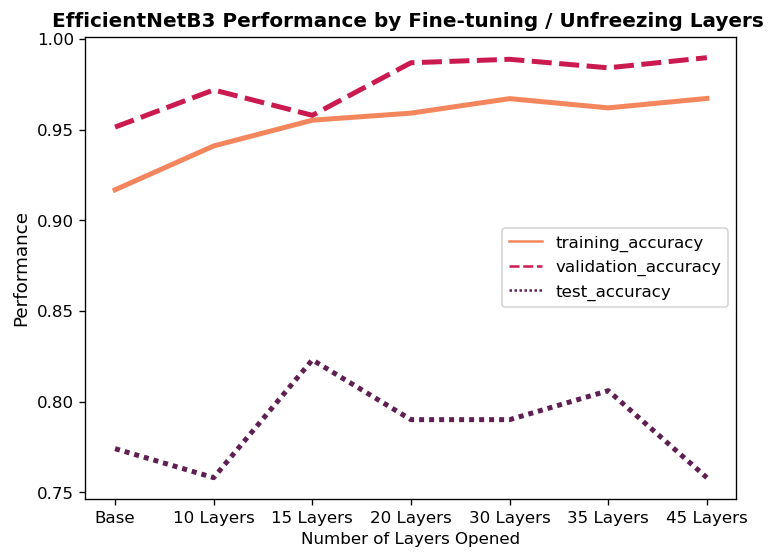

In [39]:
# Setup plot. 
plt.figure(figsize=(7,5), dpi=120)

sns.lineplot(x='opened_layers',y='value', hue = 'model_metric', data=phII_ENb3_layer_train_res_reshaped,
             errorbar=None, style='model_metric', palette='rocket_r', linewidth=3)
plt.xlabel('Number of Layers Opened', fontsize=10)
plt.ylabel('Performance', fontsize=11)
plt.title('EfficientNetB3 Performance by Fine-tuning / Unfreezing Layers ', fontweight='bold')
plt.legend(loc='center right',  bbox_to_anchor=(1, .5))

In [27]:
# Reshape Dataframe
phII_ENb3_layer_results_reshaped = pd.melt(phII_ENb3_layer_results, id_vars=['opened_layers'], value_vars=['test_precission', 'test_recall', 
                        'test_specificity'],  ##value_vars=phI_model_results.columns[1:],
                        var_name='model_metric', value_name='value') # Select all columns except 'model_name' 
phII_ENb3_layer_results_reshaped.head(3)

,opened_layers,model_metric,value
0,Base,test_precission,0.840
1,10 Layers,test_precission,0.750
2,15 Layers,test_precission,0.812


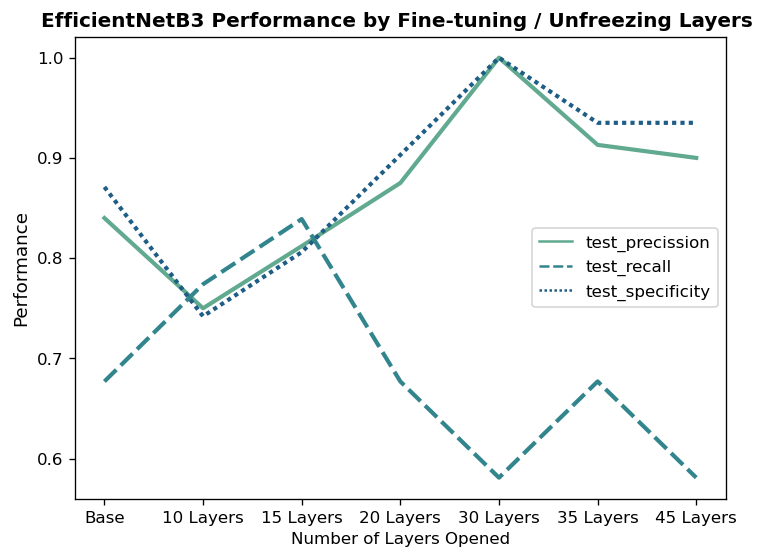

In [40]:
# Setup plot. 
plt.figure(figsize=(7,5), dpi=120)

sns.lineplot(x='opened_layers',y='value', hue = 'model_metric', data=phII_ENb3_layer_results_reshaped,
             errorbar=None, style='model_metric', palette='crest', linewidth=2.5)
plt.xlabel('Number of Layers Opened', fontsize=10)
plt.ylabel('Performance', fontsize=11)
plt.title('EfficientNetB3 Performance by Fine-tuning / Unfreezing Layers ', fontweight='bold')
plt.legend(loc='center right',  bbox_to_anchor=(1, .5))